<a href="https://colab.research.google.com/github/Himanshu-Singh11/Colab/blob/main/Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/tmp/ipython-input-1-4006757145.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(train_labels[i])])


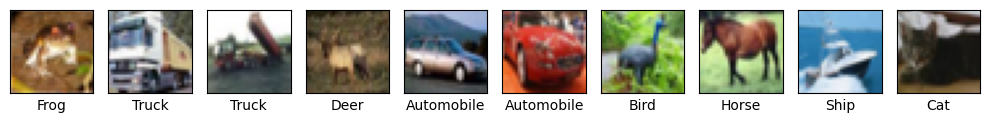

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 78ms/step - accuracy: 0.3321 - loss: 1.8127 - val_accuracy: 0.5202 - val_loss: 1.3187
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.5421 - loss: 1.2709 - val_accuracy: 0.5808 - val_loss: 1.1754
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.6096 - loss: 1.1021 - val_accuracy: 0.6226 - val_loss: 1.0804
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.6534 - loss: 0.9854 - val_accuracy: 0.6433 - val_loss: 1.0049
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6807 - loss: 0.9070 - val_accuracy: 0.6797 - val_loss: 0.9153
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.7048 - loss: 0.8408 - val_accuracy: 0.6808 - val_loss: 0.9154
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 78ms/step - accuracy: 0.7258 - loss: 0.7933 - val_accuracy: 0.6963 - val_loss: 0.8788
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.7402 - loss: 0.7464 - 

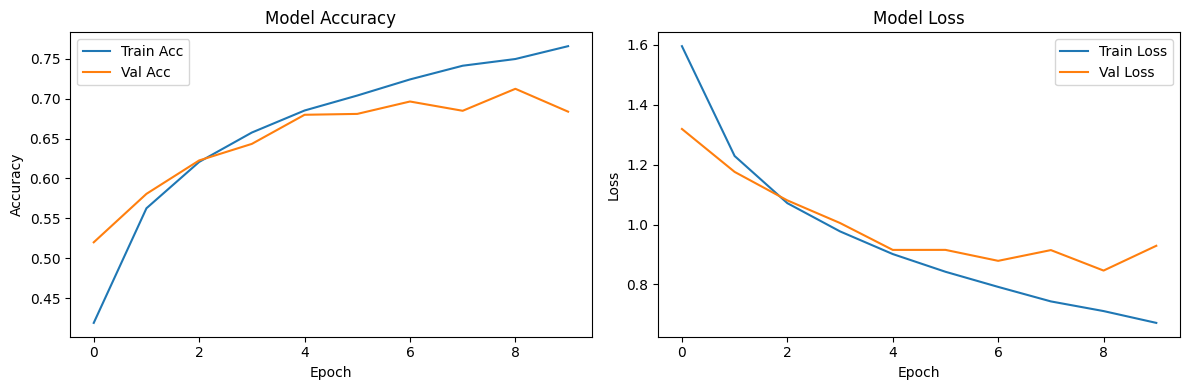

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalize the pixel values
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

#Class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

#Display first 10 images with labels
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[int(train_labels[i])])
plt.tight_layout()
plt.show()

#Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels),
                    batch_size=64)

#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

#Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ChatBot

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = {
    "hi": "hello",
    "hello": "hi there!",
    "how are you?": "i am doing great, thanks!",
    "what is your name?": "i am your chatbot assistant.",
    "bye": "goodbye!",
    "2+2":"4",
    "who created you?": "i was created by Himanshu Singh using deep learning.",
    "thank you": "you’re welcome!",
    "how old are you?": "i am timeless ",
    "what can you do?": "i can chat with you and help with basic questions.",
    "tell me a joke": "i would, but my humor chip is still under training",
    "good morning": "good morning! have a great day ahead!",
    "good night": "good night! sweet dreams.",
    "i need help": "sure! how can I help you?",
    "where are you from?": "i exist in the digital world.",
    "what is ai?": "ai means artificial intelligence — machines that think!",
    "what is machine learning?": "machine learning is how machines learn from data."
}

questions = list(data.keys())
answers = ['<start> ' + text + ' <end>' for text in data.values()]

tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(questions + answers)
VOCAB_SIZE = len(tokenizer.word_index) + 1

question_seq = tokenizer.texts_to_sequences(questions)
answer_seq = tokenizer.texts_to_sequences(answers)

max_len_q = max(len(x) for x in question_seq)
max_len_a = max(len(x) for x in answer_seq)

encoder_input_data = pad_sequences(question_seq, maxlen=max_len_q, padding='post')
decoder_input_data = pad_sequences([a[:-1] for a in answer_seq], maxlen=max_len_a - 1, padding='post')
decoder_target_data = pad_sequences([a[1:] for a in answer_seq], maxlen=max_len_a - 1, padding='post')

EMB_DIM = 64
LATENT_DIM = 128

encoder_inputs = Input(shape=(max_len_q,))
enc_emb = Embedding(VOCAB_SIZE, EMB_DIM)(encoder_inputs)
encoder_outputs, state_h, state_c = LSTM(LATENT_DIM, return_state=True)(enc_emb)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(max_len_a - 1,))
dec_emb_layer = Embedding(VOCAB_SIZE, EMB_DIM)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(LATENT_DIM, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = Dense(VOCAB_SIZE, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit([encoder_input_data, decoder_input_data],
          np.expand_dims(decoder_target_data, -1),
          batch_size=2,
          epochs=300,
          verbose=0)

print("Model training complete!")

encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(LATENT_DIM,))
decoder_state_input_c = Input(shape=(LATENT_DIM,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2 = dec_emb_layer(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)

decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2
)

def chat(input_text):
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_seq = pad_sequences(input_seq, maxlen=max_len_q, padding='post')

    states_value = encoder_model.predict(input_seq)

    target_seq = np.array([[tokenizer.word_index['<start>']]])
    decoded_sentence = ''

    for _ in range(max_len_a):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = tokenizer.index_word.get(sampled_token_index, '')

        if sampled_word == '<end>' or sampled_word == '':
            break

        decoded_sentence += sampled_word + ' '
        target_seq = np.array([[sampled_token_index]])
        states_value = [h, c]

    return decoded_sentence.strip()

print("\n🤖 Chatbot is ready! Type 'exit' to stop.\n")
while True:
    user_input = input("You: ").strip().lower()
    if user_input == 'exit':
        print("Bot: Goodbye!")
        break
    response = chat(user_input)
    print("Bot:", response if response else "I don't understand.")

Model training complete!

🤖 Chatbot is ready! Type 'exit' to stop.

You: hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Bot: hello
You: how are you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Bot: i am doing great, thanks!
You: who created you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Bot: i was created by himanshu singh using d